In [46]:
import re
import requests , json
import math

In [55]:
f = open('北京地铁.htm',encoding='gb18030')
data = {}
Line = ""
for line in f.readlines():
    line = line.strip('\n').strip(" ")
    if len(re.compile(r'subway_num').findall(line)) != 0 :
        Line = re.compile(r'>([a-zA-Z0-9_\u4e00-\u9fa5]+)</div>').findall(line)[0]
        continue
    if '<div class="station">' in line :
        Station = re.compile(r'[\u4e00-\u9fa5]+').findall(line)[0]
        try:
            url = "http://api.map.baidu.com/geocoding/v3/?address=%s&output=json&ak=i57C2zzbNQGhjFATlF1bu57kbCTw0L6N"%Station
            response = requests.get(url)
            location = json.loads(response.text)["result"]["location"]
            data[Station] = {"location" : location, "line" : Line}
        except:
            pass
print (data)
    

{'苹果园': {'location': {'lng': 111.52145104476077, 'lat': 36.086238936543346}, 'line': '6号线'}, '古城': {'location': {'lng': 100.2324803392115, 'lat': 26.883161684001312}, 'line': '1号线'}, '八角游乐园': {'location': {'lng': 116.21884171520198, 'lat': 39.91306522416191}, 'line': '1号线'}, '八宝山': {'location': {'lng': 116.24327328947903, 'lat': 39.920911909957624}, 'line': '1号线'}, '玉泉路': {'location': {'lng': 117.52975039930804, 'lat': 38.99359990421841}, 'line': '1号线'}, '五棵松': {'location': {'lng': 116.28217797586152, 'lat': 39.9418705099587}, 'line': '1号线'}, '万寿路': {'location': {'lng': 115.35248492666966, 'lat': 38.435208516938175}, 'line': '1号线'}, '公主坟': {'location': {'lng': 116.19429242607256, 'lat': 39.81074700702915}, 'line': '10号线'}, '军事博物馆': {'location': {'lng': 116.33078176654712, 'lat': 39.91560053332307}, 'line': '9号线'}, '木樨地': {'location': {'lng': 116.34049402024633, 'lat': 39.91406746721874}, 'line': '1号线'}, '南礼士路': {'location': {'lng': 116.36004740034979, 'lat': 39.921458633384084}, 'line'

In [73]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = float(origin["location"]["lat"]) , float(origin["location"]["lng"])
    lat2, lon2 = float(destination["location"]["lat"]), float(destination["location"]["lng"])
    print (lat1,lon1,lat2,lon2)
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [74]:
def get_geo_distance(Station1, Station2):
    return geo_distance(data[Station1], data[Station2])

In [77]:
get_geo_distance('国贸', '海淀黄庄')

39.91879959387437 116.46783149874459 39.98230085741413 116.32394840054968


14.152206254534352

In [78]:
import networkx as nx

In [84]:
Station_graph = nx.Graph()
Station_graph.add_nodes_from(list(data.keys()))

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

IndexError: too many indices for array

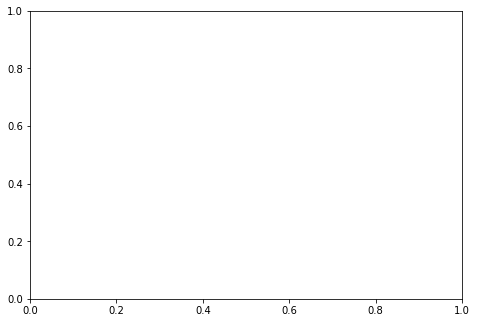

In [83]:
nx.draw(Station_graph, data, with_labels=True, node_size=30)